# TØ 2

# Opgave 1

a) Løs numerisk fra $t=0$ til $t=4$ differentialligningen
\begin{equation*}
\frac{d^2y}{dt^2}-3\frac{dy}{dt}+12y=0
\end{equation*}
under betingelserne $y(0)=0.0298$ og $\displaystyle\left.\frac{dy}{dt}\right|_{t=0}=-3$.

b) Beregn værdien af $y$ til $t=4$. Du skal nok sætte
    `max_step` til $10^{-3}$ for
at få et nøjagtigt resultat.


In [89]:
import matplotlib.pyplot as plt

import numpy as np
from scipy.integrate import solve_ivp
def dpdt(t,p):
    y = p[0]
    dydt = p[1]
    ddydt = 3*dydt-12*y
    return np.array([dydt,ddydt])

pinit = np.array([0.0298,-3])

t_start = 0
t_end = 4

solution = solve_ivp(dpdt, [t_start,t_end], pinit, max_step = 1e-3)

Final y(t) is  42.001958922181636


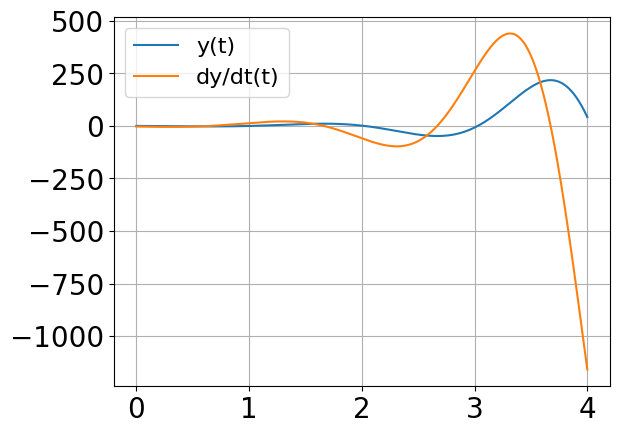

In [90]:
fig,ax = plt.subplots()
plt.rc('font', size = 16)


ax.grid()
ax.plot(solution.t, solution.y[0], label='y(t)')
ax.plot(solution.t, solution.y[1], label='dy/dt(t)')
print('Final y(t) is ', solution.y[0][-1])
ax.legend()

# Opgave 2

To forskellige ramper starter begge i $(x,y)=(0,h)$, hvor $h=\displaystyle\frac{45}{2}$ og
går gennem punktet $(x,y)=(x_1,0)$, hvor $x_1=30$. Den ene rampe er
lineært faldende, mens den anden rampe er beskrevet ved en parabel,
der endvidere går gennem punktet $(x_0,0)$, $x_0=10$.

a) Opskriv funktionsudtryk for højdeprofilen af de to ramper, hhv $y = f_\mathrm{lin}(x)$
for den lineære rampe og $y = f_\mathrm{par}(x)$ for den parabel-formede
rampe. Bestem parametre i udtrykkene med SymPy (med mindre du
umiddelbart kan gennemskue hvad parametrene skal være).
Plot de to funktioner med python-kommandoer.

![Image Title](https://python23.sci2u.dk/media/4/img/lin_par_rampe_01.png)

Vi bruger lidt let matematik:
1) Vi kan faktorisere polynomiet og ved at parablen skærer x-aksen ved $x = 30$ og $x = 10$. Dermed ved vi nu at vi kan opskrive:

    $y(x) = A (x-30)(x-10)$

2) Som det næste ved vi at $y(x = 0) = h = 45/2 = A\cdot 30\cdot 10 = 300A \Rightarrow A = 3/40$, så:

    $y(x) = \frac{3(x-10)(x-30)}{40}$


Den lineære funktion er noget nemmere. Vi starter i $h$ og skal ramme $y(30) = 0$

$x = Bx + C \Rightarrow C = 45/2$

$B \cdot 30 = -45/2 \ \Rightarrow B = -3/4$

In [91]:
xs = np.linspace(0,30,300)
xsDot = np.linspace(30,40,100)
def yparabel(x):
    return 3*(x-10)*(x-30)/40
def yLinear(x):
    return -3/4 * x + 45/2

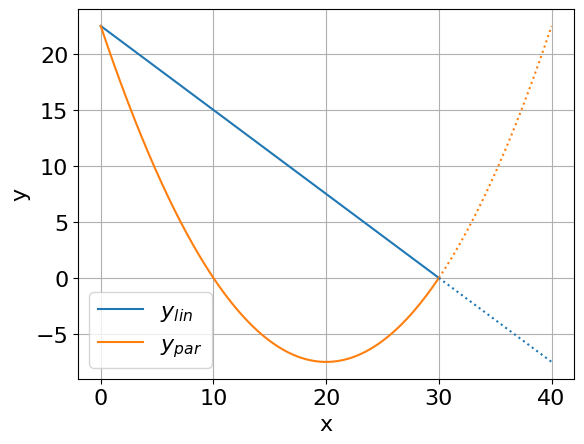

In [92]:
fig,ax = plt.subplots()
ax.plot(xs,yLinear(xs),label=r'$y_{lin}$')
ax.plot(xs,yparabel(xs),label=r'$y_{par}$')

ax.plot(xsDot,yparabel(xsDot),ls = 'dotted', color = 'C1')
ax.plot(xsDot,yLinear(xsDot),ls = 'dotted', color = 'C0')

ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()

Bevægelsen for et legeme på ramperne under indvirkning af
tyngdekraften er beskrevet ved følgende differentialligning:
\begin{equation*}
\frac{d^2x}{dt^2}=\frac{\displaystyle -\frac{dy}{dx}}{1+\left(\displaystyle\frac{dy}{dx}\right)^2}\Bigl(g+\frac{d^2y}{dx^2}\left(\frac{dx}{dt}\right)^2\Bigr),
\end{equation*}
hvor $g=9.8$ er tyngdeaccelerationen og hvor $y(x)$ er rampens højdeprofil som funktion af $x$. For den lineære
rampe er hældningen, $\displaystyle\frac{dy}{dx}$, en konstant for alle
værdier af $x$ mens den anden afledede, $\displaystyle\frac{d^2y}{dx^2}$, er
nul. For den parabel-formede rampe er hældningen en funktion af $x$ og
den anden afledede en
konstant. 
Differentialligningen
kan synes stor og kompliceret, men læg mærke til at når $y$ er en
kendt funktion af $x$, så er det eneste
ubekendte, der er tilbage i ligningen, de to hhv 1.- og
2.-ordens tidsafledede af $x$-positionen, her markeret med rødt:
\begin{equation*}
\color{red}{\frac{d^2x}{dt^2}}=\frac{\displaystyle -\frac{dy}{dx}}{1+\left(\displaystyle\frac{dy}{dx}\right)^2}\Bigl(g+\frac{d^2y}{dx^2}\left(
\color{red}{\frac{dx}{dt}}\right)^2\Bigr).
\end{equation*}
Differentialligningen har altså samme form som dem, der blev løst
til forelæsningen
og kan dermed løses på
samme måde.



b) Udled med SymPy (eller pen og papir, hvis det er meget nemt)
de omtalte udtryk for hældning og den anden afledede. Løs nu
differentialligningen med
`solve_ivp` for tider i intervallet $0\le t\le
4$ og plot $x(t)$ for hver af de to ramper så du kan afgøre for hvilken
rampe, et legeme startet stilleliggende ud i $\bigl(0,f(0)\bigr)$
hurtigst muligt vil passere $x=x_1$.
![Image Title](https://python23.sci2u.dk/media/4/img/lin_par_rampe_02.png)
Når $x$ først er fundet som funktion af $t$ kan man
efterfølgende bestemme $y(t)$ ud fra den geometriske betingelse at
legemet befinder sig på rampen, dvs.
\begin{equation*}
y(t) = f\big(x(t)\big),
\end{equation*}
hvor $f(x)$ er $f_\mathrm{lin}(x)$ eller $f_\mathrm{par}(x)$ alt efter hvilken rampe, der er tale om.


EMIL: Ovenstående er nemt nok. For den lineære funktion er $dy/dx = -3/4$ og den anden afledte er 0

For parablen bliver det lidt mere bøvlet. Hvis vi skriver den ud:
$y(x) = 3/40 (x-10)(x-30) = 3/40 (x^2 - 30x -10x +300)$

$\Rightarrow dy/dx = 3/40 * (2x-40),\quad ddy/ddx = 6/40$

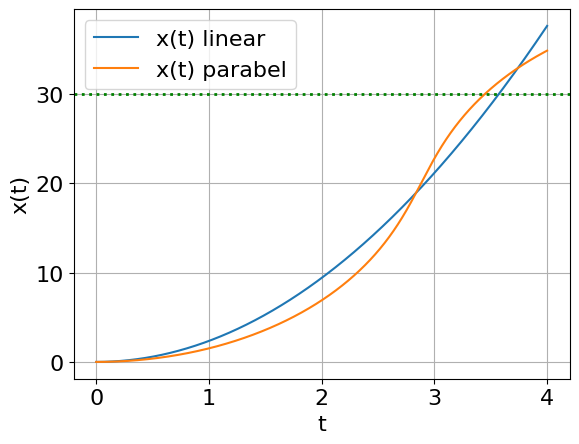

In [93]:
dyLin = -3/4

def dyPar(x):
    return 3/40 * (2*x -40)
ddyPar = 6/40


g = 9.8

def ddxPar(t,p):
    x = p[0]
    dxdt = p[1]
    ddxdt = -dyPar(x) / (1+ dyPar(x)**2) * (g + ddyPar * (dxdt)**2)
    return np.array([dxdt,ddxdt])

def ddxLin(t,p):
    x = p[0]
    dxdt = p[1]
    ddxdt = -dyLin / (1+ dyLin**2) * (g)
    return np.array([dxdt,ddxdt])


h = 45/2
pinit = np.array([0,0])

t_start = 0
t_end = 4



solutionPar = solve_ivp(ddxPar, [t_start,t_end], pinit, max_step = 1e-3)
solutionLin = solve_ivp(ddxLin, [t_start,t_end], pinit, max_step = 1e-3)

fig,ax = plt.subplots()
ax.plot(solutionLin.t, solutionLin.y[0], label='x(t) linear')
ax.plot(solutionPar.t, solutionPar.y[0], label='x(t) parabel')

ax.grid()
ax.set_xlabel('t')
ax.set_ylabel('x(t)')

ax.axhline(30,ls = 'dotted', color = 'green',linewidth = 2)

ax.legend()

c) Løs nu differentialligningen igen for hver af de to ramper. Sørg
for at få de to løsninger til de samme ækvidistante tider.
Udarbejd derefter en update-funktion og test den:


![Image Title](https://python23.sci2u.dk/media/4/img/lin_par_rampe_03.png)
![Image Title](https://python23.sci2u.dk/media/4/img/lin_par_rampe_04.png)
![Image Title](https://python23.sci2u.dk/media/4/img/lin_par_rampe_05.png)


Foretag en
animation af den samtidige bevægelse af to legemer,
der startes på hver deres rampe.

![Image Title](https://python23.sci2u.dk/media/4/img/lin_par_rampe_06.gif)



d) Fokusér nu på den parabel-formede rampe og lad den være defineret
for $0\le x\le b$, hvor $b=40$. Bestem et legemes bevægelse på rampen
i tiden $0\le t\le 23$ og notér dig at den bliver oscillatorisk. Idet
legemes masse sættes til $m=1/7$ skal du ud fra outputtet fra
`solve_ivp` beregne og plotte den kinetiske og den
potentielle energi af legemet som funktion af tiden.
Læg mærke til at $\displaystyle\frac{dx}{dt}$ *ikke* er hastigheden $v$ af
legemet. Det er kun $x$-komposanten af legemets hastighed. Da legemet er
tvunget til at bevæge sig ad rampen vil dets hastighedsvektor
imidlertid altid pege langs med rampen, der har retningsvektoren:
\begin{equation*}
\hat{\mathbf{s}} = \frac{1}{\sqrt{1+\left(\displaystyle\frac{dy}{dx}\right)^2}}\left[\begin{array}{c}1\\ \displaystyle\frac{dy}{dx}\end{array}\right],
\end{equation*}
hvorfor legemets hastighedsvektor kan skrives:
\begin{equation*}
\mathbf{v} = v\hat{\mathbf{s}}.
\end{equation*}
Med den sædvanlige måde at skrive hastighedsvektoren på:
\begin{equation*}
\mathbf{v} = 
  \left[\begin{array}{c}\displaystyle\frac{dx}{dt}\\ \\
        \displaystyle\frac{dy}{dt}\end{array}\right]
\end{equation*}
kan man ud fra $x$-komposanterne udlede dette udtryk:
\begin{equation*}
v = \displaystyle\frac{dx}{dt}\sqrt{1+\left(\displaystyle\frac{dy}{dx}\right)^2}.
\end{equation*}
Verificér at den mekaniske energi er bevaret ved at lave dette plot af
potentiel, kinetisk og mekanisk energi:

![Image Title](https://python23.sci2u.dk/media/4/img/lin_par_rampe_07.png)

Bestem endvidere den maksimale kinetiske energi
med `np.max`-kommandoen på listen af beregnede
kinetiske energier. Udskriv værdien.


In [94]:
solutionParLong = solve_ivp(ddxPar, [t_start,23], pinit, max_step = 1e-4)

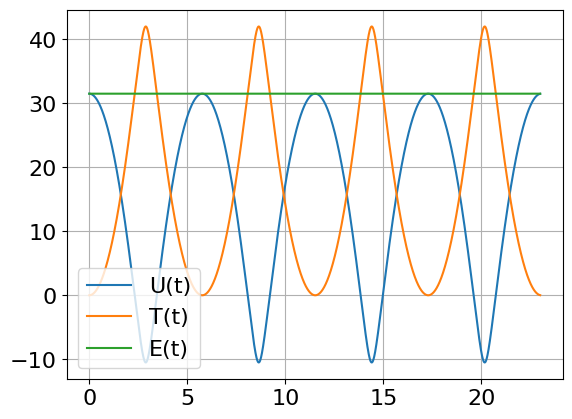

In [95]:
m = 1/7

U = m * g * yparabel(solutionParLong.y[0])
T = 0.5 * m * solutionParLong.y[1]**2 * (1 + dyPar(solutionParLong.y[0])**2) 



fig,ax = plt.subplots()
ax.plot(solutionParLong.t, U, label='U(t)')
ax.plot(solutionParLong.t, T, label='T(t)')
ax.plot(solutionParLong.t, U+T, label='E(t)') 


ax.legend()
ax.grid()

e) Lav evt en animation af den oscillatoriske bevægelse. 

![Image Title](https://python23.sci2u.dk/media/4/img/lin_par_rampe_08.gif)

f) Vi vender nu tilbage til spørgsmålet om hvornår legemerne passerer
$x_1$ når de startes ud i $(0,h)$. Man kan lave en hel serie af
forskellige parabel-formede ramper, hvis $x_0$ betragtes som en parameter.
Her er fire ramper, der alle starter i $(0,h)$ og går gennem $(x_0,
0)$ og $(x_1,0)$:

![Image Title](https://python23.sci2u.dk/media/4/img/lin_par_rampe_09.png)

Bemærk hvordan $x_0=1000$ næsten bliver til en ret linie. Lav et
tilsvarende plot af nogle parabler for forskellige $x_0$-værdier.



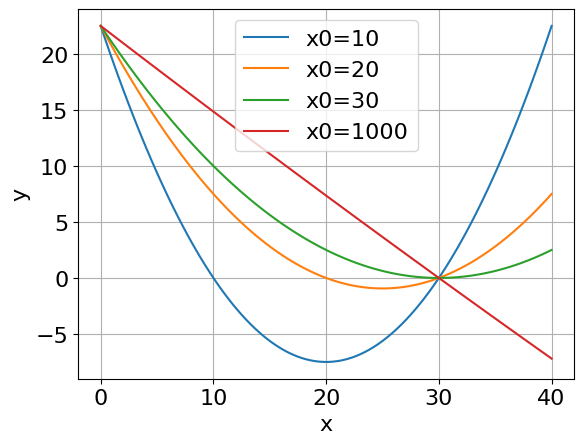

In [96]:
fig, ax = plt.subplots()
xs = np.linspace(0, 40, 100)
x1 = 30
for x0 in [10, 20, 30, 1000]:
    A = h/(x0*x1)
    ax.plot(xs, A*(xs-x1)*(xs-x0), label=f'x0={x0}')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
ax.legend()

g) Skriv nu en funktion, der givet $x_0$:
- med SymPy bestemmer funktionsforskriften for parablen, samt dennes
  1. og 2. afledede.
- konverterer SymPy-funktionerne til NumPy-funktioner.
- løser differentialligningen
  frem til legemet passerer $x_1$. Dette håndteres som en hændelse,
  der stopper
  løsningen af differentialligningen.
- returnerer tidspunktet for ankomsten til $x_1$.


Testkør funktionen med $x_0=10$ og $x_0=1000$, der svarer til den oprindelige
parabelformede rampe samt approximerer den lineære rampe. Fra figuren i
spørgsmål b) kan du aflæse at du skal få ca. $3.45$ og $3.55$. Hvad får du?


In [97]:
N = 12
x0vals = np.logspace(1,3,N)

def reached_goal(t,q):
    return q[0] - x1
reached_goal.terminal = True

def time_to_x1(x0):
    A = h/(x0*x1)
    pinit = np.array([0,0])

    def dydx(x,x0):
        return A * (2*x - (x1+x0))
    ddydx = 2*A
    def ddq(t,q):
        x = q[0]
        dxdt = q[1]
        ddxdt = -dydx(x,x0) / (1+ dydx(x,x0)**2) * (g + ddydx * (dxdt)**2)
        return np.array([dxdt,ddxdt])
    t_goal = solve_ivp(ddq, [0,23], pinit,max_step = 1e-3, events = [reached_goal]).t[-1]
    return t_goal
time_to_x1(10),time_to_x1(1000)


(3.4472382750624564, 3.5491440690687)

h) Scan nogle værdier af $x_0$ og plot en kurve over den tid det tager
at nå frem til $x_1$ som funktion af $x_0$.

![Image Title](https://python23.sci2u.dk/media/4/img/lin_par_rampe_10.png)


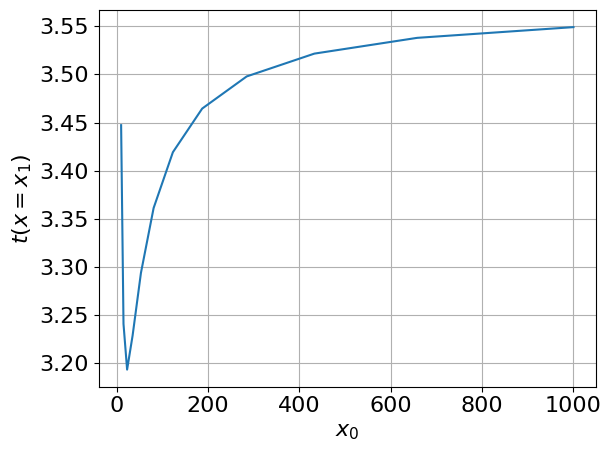

In [98]:


tvals = []
for x0 in x0vals:
    tvals.append(time_to_x1(x0))

fig, ax = plt.subplots()
ax.plot(np.abs(x0vals), tvals)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$t(x=x_1)$')
ax.grid()
fig.tight_layout()
fig.savefig('lin_par_rampe_10.png')

i) Benyt `fmin` til at bestemme
den optimale værdi af $x_0$, der bringer legemet hurtigst muligt frem
til $x_1$. Afsæt det fundne punkt i plottet:

![Image Title](https://python23.sci2u.dk/media/4/img/lin_par_rampe_11.png)

Forhold dig til at det ikke er den lineære rampe, der den
optimale. Kan du forklare hvorfor?

Hint, hvis du får en fejl med `fmin`: Når `fmin` søger kalder den funktionen med et
1-dimensionelt NumPy array med ét tal. Alt efter hvordan du bruger
dette tal i funktionen kan det gå galt. SymPy bryder sig ikke om et
sådant NumPy-array. Det kan derfor være en god idé at gøre således:
```
x0opt = fmin(lambda x0: time_to_x1(float(x0)), 10)[0]
```
hvor `time_to_x1` er din funktion fra spørgsmål g
og hvor `lambda`-funktionen bruges til at wrappe
den så `fmin`'s NumPy-array bliver konverteret til
en float.



C:\Users\au581149\AppData\Local\Temp\ipykernel_10120\1088850725.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x0opt = fmin(lambda x0: time_to_x1(float(x0)), 10)[0]


Optimization terminated successfully.
         Current function value: 3.193029
         Iterations: 21
         Function evaluations: 42


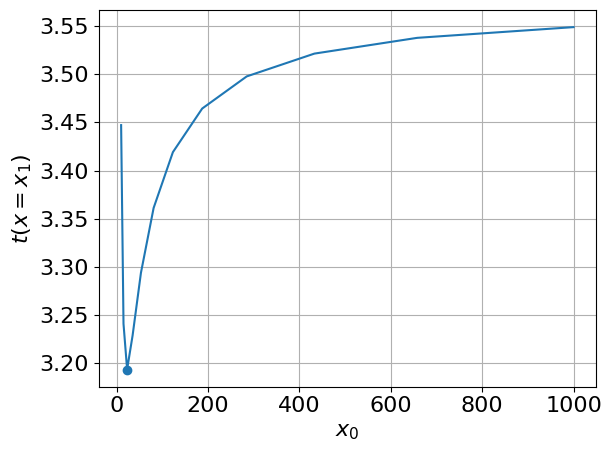

In [99]:
from scipy.optimize import fmin
x0opt = fmin(lambda x0: time_to_x1(float(x0)), 10)[0]
ax.scatter(x0opt,time_to_x1(x0opt))
fig.tight_layout()
fig.savefig('lin_par_rampe_11.png')
fig

# Opgave 3 (hvis du synes den lyder sjov)

Denne opgave knytter sig til
  rampe-opgaven ovenfor og handler om at 
udlede udtrykket for
  differentialligningen.

a) Start med at argumentere for at forholdet mellem den differentielle
tilvækst i vejlængden langs rampen og den differentielle tilvækst i
$x$-koordinaten på rampen er:
\begin{equation*}
\displaystyle\frac{ds}{dx}=
\sqrt{1+\left(\frac{dy}{dx}\right)^2}
\end{equation*}
b) Opskriv dernæst Newton II for et legeme på rampen:
\begin{equation*}
\begin{array}{rcl}
  m\color{blue}{\displaystyle\frac{d^2s}{dt^2}}&=&(0,-mg)\cdot \hat{\mathbf{s}}\\ \\
  &=& -mg\frac{\displaystyle\frac{dy}{dx}}{\sqrt{\displaystyle 1+\left(\displaystyle\frac{dy}{dx}\right)^2}}.
\end{array}
  \end{equation*}
du kan få mening i det ud fra denne figur:


![Image Title](https://python23.sci2u.dk/media/4/img/rampe_parabel_II_zoom.png)


c) Benyt denne kombination af kædereglen og produktreglen:
\begin{equation*}
\begin{array}{rcl}
\color{blue}{\displaystyle\frac{d^2s}{dt^2}}&=&\displaystyle\frac{d}{dt}\Bigl\{\displaystyle\frac{ds}{dx}\displaystyle\frac{dx}{dt}\Bigr\}\\
  \\
  &=&
\color{green}{\displaystyle\frac{d}{dt}\Bigl\{\displaystyle\frac{ds}{dx}\Bigr\}}\displaystyle\frac{dx}{dt}
      +\displaystyle\frac{ds}{dx}\displaystyle\frac{d}{dt}\Bigl\{\displaystyle\frac{dx}{dt}\Bigr\}\\ \\
                               &=&
                                   \big(\displaystyle\frac{dx}{dt}\big)^2
                                   \frac{\displaystyle\frac{dy}{dx}}{\sqrt{\displaystyle
                                   1+\left(\displaystyle\frac{dy}{dx}\right)^2}}
                                   \displaystyle\frac{d^2y}{dx^2}
                                   + \sqrt{\displaystyle                                                         
                                   1+\left(\displaystyle\frac{dy}{dx}\right)^2}\displaystyle\frac{d^2x}{dt^2}
                                   \end{array}
\end{equation*}

hvor den grønne del er blevet omskrivet på følgende vis:
\begin{equation*}
\begin{array}{rcl}
\color{green}{\displaystyle\frac{d}{dt}\Bigl\{\displaystyle\frac{ds}{dx}\Bigr\}}
  &=&\displaystyle\frac{dx}{dt}\displaystyle\frac{d}{dx}\Bigl\{\displaystyle\frac{ds}{dx}\Bigr\}\\ \\
  &=&\displaystyle\frac{dx}{dt}\displaystyle\frac{d}{dx}\sqrt{1+\bigl(\displaystyle\frac{dy}{dx}\bigr)^2}\\ \\
  &=&\displaystyle\frac{dx}{dt}\frac{1}{2\sqrt{1+\bigl(\displaystyle\frac{dy}{dx}\bigr)^2}}\cdot
      2\displaystyle\frac{dy}{dx}\displaystyle\frac{d^2y}{dx^2}
\end{array}
\end{equation*}
d) De to udtryk skrevet med blå kan nu sættes lig hinanden og du kan
udlede 
  differentialligningen.

# Opgave 4

Det oplyses om en funktion $y(x)$ at den minimerer dette funktional:
$$
I(y)=\displaystyle\int_0^1\left(\frac{dy}{dx} - y(x)\right)^2 dx,\quad y(0)=0,\quad y(1)=2,
$$
når $y(x)=y_0(x)$, hvor:
$$
y_0(x)=2\frac{\sinh(x)}{\sinh(1)}
$$

a) Beregn værdien $I(y_0)$

Brug Wolfram og få $I(y_0) = 8/(e^2-1) \approx 1.25$

For at beregne $I(y)$ for andre funktioner, der opfylder grænsebetingelserne indføres:

$$
\Delta (x) = \sin(\pi x)
$$

b) Beregn $I(y_a)$, hvor:

$$
y_a(x) = y_0(x) + a \Delta (x)
$$

for værdier af $a$ mellem $-1.2$ og $1.2$. Plot $y_a(x)$ for de forskellige værdier af $a$ og benyt en farve, der afspejler værdien af $I(y_a)$.

![Image Title](https://python23.sci2u.dk/media/4/img/functional_analysis_101.png)

In [100]:
deltay = sp.sin(symx*sp.pi)
deltay.subs(symx,0),deltay.subs(symx,0.5),deltay.subs(symx,1)

(0, 1, 0)

-1.2 9.078256310781663
-0.96 6.260854850019301
-0.72 4.069542602759687
-0.48 2.5043195690028197
-0.24 1.5651857487486986
0.0 1.2521411419973252
0.24 1.5651857487486986
0.48 2.5043195690028193
0.72 4.069542602759687
0.9600000000000002 6.2608548500193
1.2 9.078256310781663


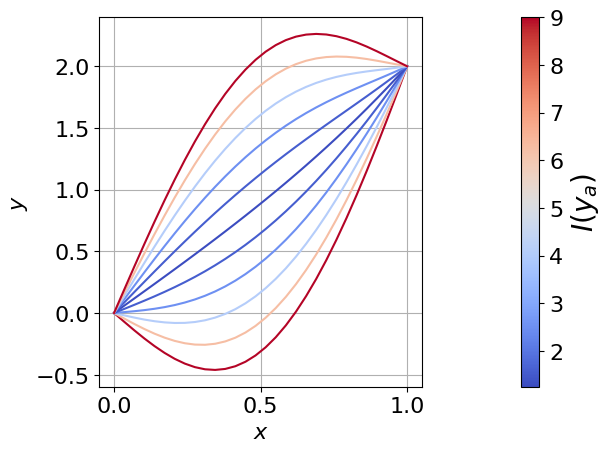

In [101]:
fig, ax = plt.subplots()

numx = np.linspace(0,1,30)

norm = plt.Normalize(vmin=1.25, vmax=9)
cmap = plt.cm.coolwarm

for a in np.linspace(-1.2,1.2,11):
    symy = symy0 + a * deltay
    symdydx = sp.diff(symy,symx)
    vali = float(sp.integrate((symdydx - symy)**2,(symx,0,1)))
    print(a,vali)
    numy = sp.lambdify(symx,symy,'numpy')
    ax.plot(numx,numy(numx),color=cmap(norm(vali))) #f'C{int(vali)}')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.2)
cbar.set_label('$I(y_a)$', fontsize=20)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid('on')

In [102]:
fig.tight_layout()
fig.savefig('functional_analysis_101.png')